In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('./assets/dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       902 non-null    int64 
 1   Attrition                 902 non-null    object
 2   BusinessTravel            902 non-null    object
 3   DailyRate                 902 non-null    int64 
 4   Department                902 non-null    object
 5   DistanceFromHome          902 non-null    int64 
 6   Education                 902 non-null    int64 
 7   EducationField            902 non-null    object
 8   EmployeeCount             902 non-null    int64 
 9   EmployeeNumber            902 non-null    int64 
 10  EnvironmentSatisfaction   902 non-null    int64 
 11  Gender                    902 non-null    object
 12  HourlyRate                902 non-null    int64 
 13  JobInvolvement            902 non-null    int64 
 14  JobLevel                  

In [83]:
# number of null values in all feature
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Text(0.5, 1.0, 'Attrition Distribution')

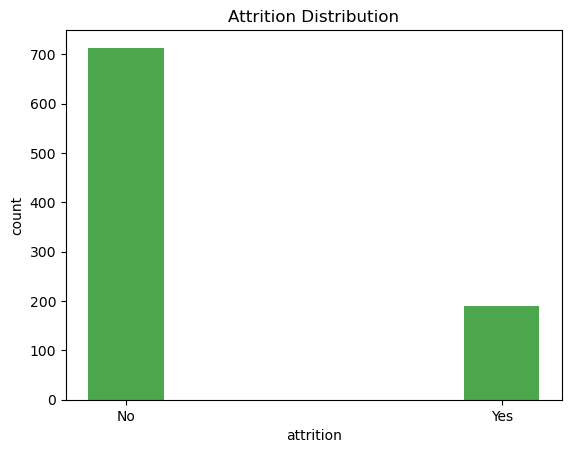

In [84]:
# number of target feature in each category
plt.bar(df["Attrition"].unique(), df["Attrition"].value_counts(), width=0.2, color='green', alpha=0.7)
plt.xlabel("attrition")
plt.ylabel("count")
plt.title("Attrition Distribution")

In [85]:
# drop columns that contain less than two distinct values
for data in df.columns:
    if df[data].nunique() < 2:
        del df[data]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1478,4,...,3,4,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1965,4,...,3,1,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,722,4,...,3,4,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1606,2,...,3,3,1,32,3,3,30,8,12,13


Text(0, 0.5, 'average income')

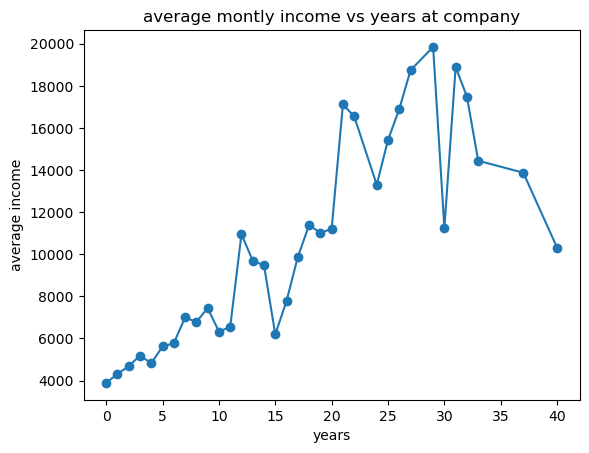

In [86]:
# the average MonthlyIncome against the YearsAtCompany
avg_income_in_years = df.groupby(df["YearsAtCompany"])["MonthlyIncome"].mean().reset_index()
plt.plot(avg_income_in_years["YearsAtCompany"], avg_income_in_years["MonthlyIncome"], marker="o")
plt.title("average montly income vs years at company")
plt.xlabel("years")
plt.ylabel("average income")

In [87]:
# which departments have the highest and lowest incomes on average
avg_income_in_department = df.groupby(df["Department"])["MonthlyIncome"].mean().reset_index()

lowest_income = avg_income_in_department.sort_values(by='MonthlyIncome')["Department"][0]
highest_income = avg_income_in_department.sort_values(by='MonthlyIncome')["Department"].iloc[-1]

print(f"highest income department:{highest_income},lowest income department:{lowest_income}")

highest income department:Sales,lowest income department:Human Resources


In [88]:
# label encode all categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

df["Attrition"].value_counts()

Attrition
0    713
1    189
Name: count, dtype: int64

In [89]:
# attrition column is targeted
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

X_test_scale = scaler.transform(X_test)

In [90]:
class CustomKNN:
    def __init__(self, k):
        self.y_train = None
        self.X_train = None
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = []
        for x in X:
            predictions.append(self._predict(x))
        return predictions

    def _predict(self, x):
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_neighbors = np.argsort(distances)[:self.k]
        k_neighbors_label = self.y_train[k_neighbors]
        predicted_label = np.argmax(np.bincount(k_neighbors_label))
        return predicted_label

Model's Accuracy: 0.8287292817679558
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       147
           1       0.62      0.24      0.34        34

    accuracy                           0.83       181
   macro avg       0.73      0.60      0.62       181
weighted avg       0.80      0.83      0.80       181



Text(0.5, 1.0, 'Confusion Matrix Heatmap for k:7')

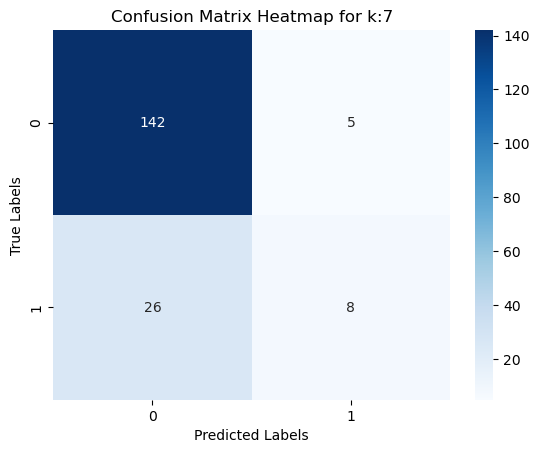

In [91]:
# get the best k for knn
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []
custom_models = {}

for idx, k in enumerate(k_values):
    knn = CustomKNN(k)
    knn.fit(X_train_scale, y_train)
    y_pred_custom = knn.predict(X_test_scale)

    accuracy = accuracy_score(y_test, y_pred_custom)
    custom_models[k] = [accuracy, knn]

bestk = max(custom_models, key=lambda k: data[k][0])
best_model = custom_models[bestk][1]

preds = best_model.predict(X_test_scale)
knn_acc = accuracy_score(y_test, preds)

print("Model's Accuracy:", knn_acc)
print(classification_report(y_test, preds))

confusion = confusion_matrix(y_test, preds)

ax = sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title(f'Confusion Matrix Heatmap for k:{bestk}')

In [92]:
# implement random forest on dataset
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
rf_cv = GridSearchCV(rf, param_grid=param_grid_rf, cv=5)

rf_cv.fit(X_train_scale, y_train)

preds = rf_cv.best_estimator_.predict(X_test_scale)
rf_acc = accuracy_score(y_test, preds)

print("Model's Accuracy:", rf_acc)
print("Model's Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Model's Accuracy: 0.856353591160221
Model's Accuracy: 0.856353591160221
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       147
           1       0.83      0.29      0.43        34

    accuracy                           0.86       181
   macro avg       0.85      0.64      0.68       181
weighted avg       0.85      0.86      0.83       181



Text(0.5, 1.0, 'Confusion Matrix Heatmap for 300 estimators')

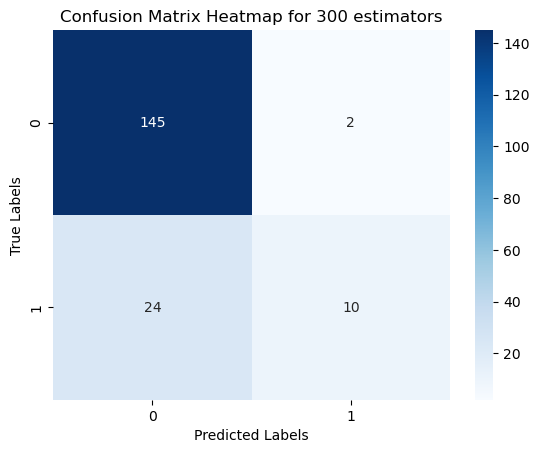

In [93]:
confusion = confusion_matrix(y_test, preds)
ax = sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title(f'Confusion Matrix Heatmap for {rf_cv.best_params_["n_estimators"]} estimators')

<Axes: xlabel='importance', ylabel='feature'>

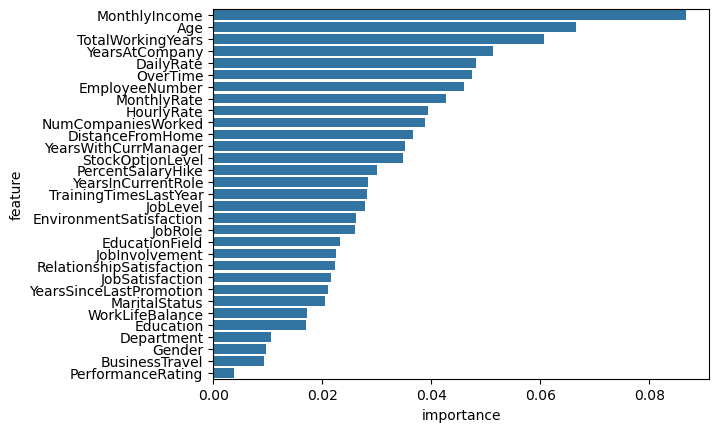

In [94]:
# determine the importance of each feature
best_rf = rf_cv.best_estimator_
feature_importance_df = pd.DataFrame({"feature": X.columns, "importance": best_rf.feature_importances_}).sort_values(
    by="importance", ascending=False).reset_index()

sns.barplot(y=feature_importance_df["feature"], x=feature_importance_df["importance"], data=feature_importance_df)

In [95]:
# using baggingknn  to ensemble estimators
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=bestk), n_estimators=300, random_state=42)

bagging_knn.fit(X_train_scale, y_train)
preds = bagging_knn.predict(X_test_scale)
bagging_knn_acc = accuracy_score(y_test, preds)

print("Model's Accuracy:", bagging_knn_acc)

print("Model's Accuracy:", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))


Model's Accuracy: 0.8287292817679558
Model's Accuracy: 0.8287292817679558
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       147
           1       0.62      0.24      0.34        34

    accuracy                           0.83       181
   macro avg       0.73      0.60      0.62       181
weighted avg       0.80      0.83      0.80       181



Text(0.5, 1.0, 'Confusion Matrix Heatmap for bagging classifier base on knn with 300 estimators')

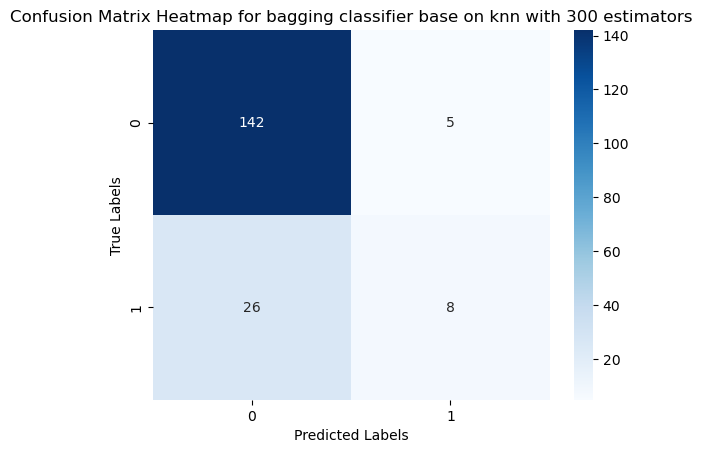

In [96]:
confusion = confusion_matrix(y_test, preds)
ax = sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title(
    f'Confusion Matrix Heatmap for bagging classifier base on knn with {rf_cv.best_params_["n_estimators"]} estimators')

In [97]:
adaboost = AdaBoostClassifier()

param_grid_ada = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
ada_grid = GridSearchCV(estimator=adaboost, param_grid=param_grid_ada, cv=5)
ada_grid.fit(X_train_scale, y_train)
pred = ada_grid.best_estimator_.predict(X_test_scale)
ada_grid_acc = accuracy_score(y_test, preds)

print("Model's Accuracy:", ada_grid_acc)
print(classification_report(y_test, preds))


Model's Accuracy: 0.8287292817679558
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       147
           1       0.62      0.24      0.34        34

    accuracy                           0.83       181
   macro avg       0.73      0.60      0.62       181
weighted avg       0.80      0.83      0.80       181



Text(0.5, 1.0, 'Confusion Matrix Heatmap for adaboost classifier with 100 estimators')

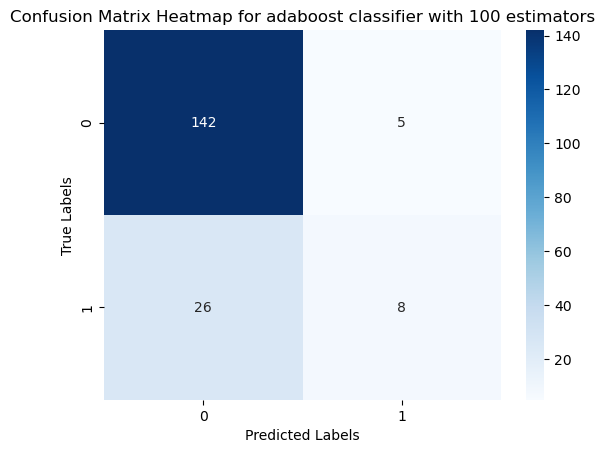

In [98]:
confusion = confusion_matrix(y_test, preds)
ax = sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title(
    f'Confusion Matrix Heatmap for adaboost classifier with {ada_grid.best_params_["n_estimators"]} estimators')

model comparison dataframe:
           model  accuracy
0            Knn  0.828729
1  Random forest  0.856354
2    Bagging Knn  0.828729
3       Adaboost  0.828729


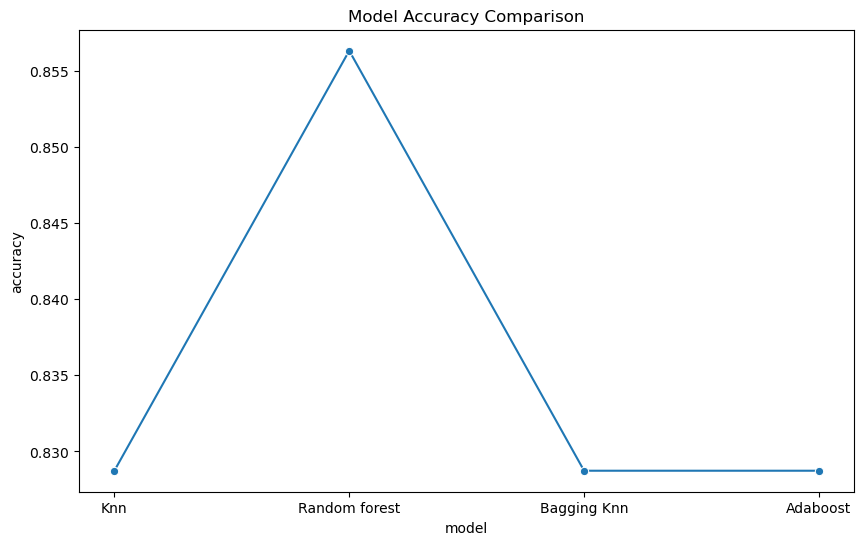

In [111]:
model = ["Knn", "Random forest", "Bagging Knn", "Adaboost"]
accuracy = [knn_acc, rf_acc, bagging_knn_acc, ada_grid_acc]
df_acc = pd.DataFrame({"model": model, "accuracy": accuracy})

print("model comparison dataframe:")
print(df_acc)

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_acc["model"], y=df_acc["accuracy"], marker="o")
plt.xlabel("model")
plt.ylabel("accuracy")
plt.title('Model Accuracy Comparison')
plt.show()